### Project flow

* __Step 1: Importing the Relevant Libraries__
    
* __Step 2: Data Inspection__
    
* __Step 3: Data Cleaning__
    
* __Step 4: Exploratory Data Analysis__
    
* __Step 5: Building Model__

* __Step 1: Importing the Relevant Libraries__
    

In [215]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

* __Step 2: Data Inspection__

In [216]:
train = pd.read_csv("train (1).csv")
test = pd.read_csv("test (1).csv")

In [217]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [218]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [219]:
print(train.shape,test.shape)

(891, 12) (418, 11)


* __We have 891 rows and 12 columns in Train set whereas Test set has 418 rows and 11 columns.__

* __Step 3: Data Cleaning__

##### Checking for null values

In [220]:
train.isna().sum()/len(train)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

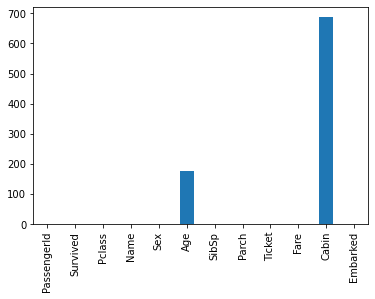

In [221]:
train.isna().sum().plot(kind='bar')
plt.show()

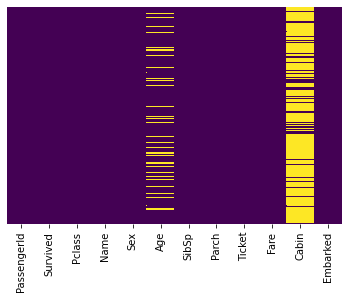

In [222]:
sns.heatmap(train.isna(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

* **Age column contain 19.86 percent missing values whereas cabin column contain 77% missing values**

In [223]:
test.isna().sum()/len(train)*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             9.652076
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.112233
Cabin          36.700337
Embarked        0.000000
dtype: float64

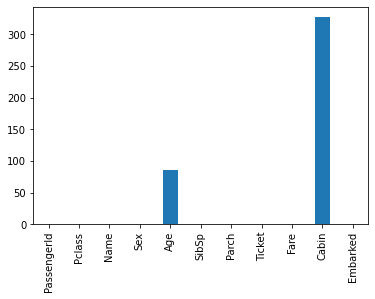

In [224]:
test.isna().sum().plot(kind='bar')
plt.show()

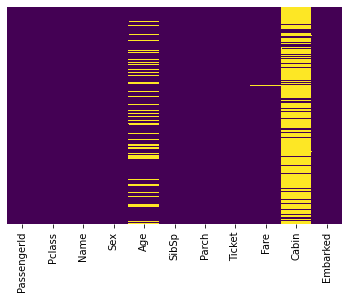

In [225]:
sns.heatmap(test.isna(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [226]:
test['Fare'].isna().sum()

1

* __Step 4: Exploratory Data Analysis__

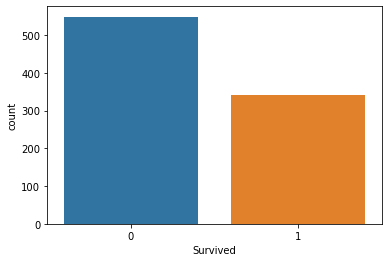

In [227]:
sns.countplot('Survived',data=train)
plt.show()

In [228]:
train[train.Survived==0]['Survived'].count()/len(train)*100

61.61616161616161

In [229]:
train[train.Survived==1]['Survived'].count()/len(train)*100

38.38383838383838

##### 60:40 its some what balanced dataset

**Survised number is less as compared to non survived**

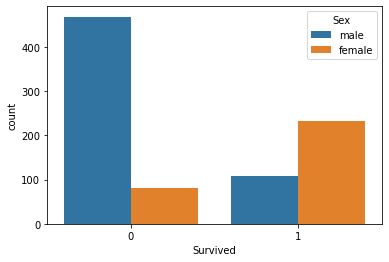

In [230]:
sns.countplot('Survived',data=train,hue='Sex')
plt.show()

**More number of male died**

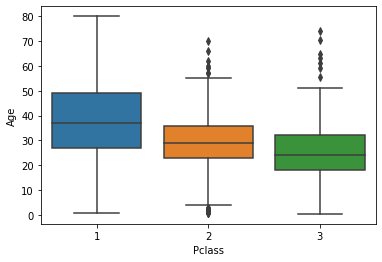

In [231]:
sns.boxplot(x='Pclass',y='Age',data=train)
plt.show()

In [232]:
train.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

***We are going to replace missing values in age column with mean valu of there repsective classes***

In [233]:
def make_impute(columns):
    Age=columns[0]
    pclass=[columns[1]]
    if pd.isnull(Age):
        if pclass==1:
            return 38
        elif pclass==2:
            return 30
        else:
            return 25
    else:
        return Age

In [234]:
train['Age']=train[['Age','Pclass']].apply(make_impute,axis=1)

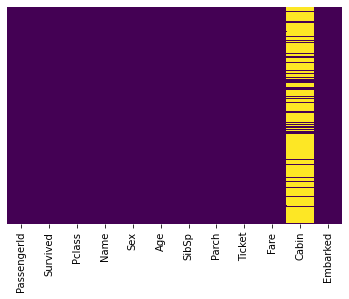

In [235]:
sns.heatmap(train.isna(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [236]:
test['Age']=test[['Age','Pclass']].apply(make_impute,axis=1)

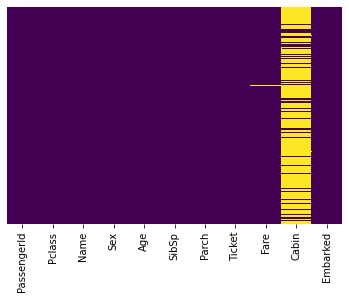

In [237]:
sns.heatmap(test.isna(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

**Since cabin column contain more than 50% missing values its good to drop that column for the analysis**

In [238]:
train=train.drop('Cabin',axis=1)

In [239]:
test=test.drop('Cabin',axis=1)

#### Categorical to numerical

In [240]:
train_cat=x_train.select_dtypes(include=[np.object])

test_cat=x_test.select_dtypes(include=[np.object])

In [241]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in train_cat:
    train[i]=le.fit_transform(train[i])

In [242]:
for i in test_cat:
    test[i]=le.fit_transform(test[i])

In [243]:
x=train.drop('Survived',axis=1)
y=train['Survived']

In [244]:
from sklearn.model_selection import train_test_split

In [249]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.3,random_state=45,stratify=y)

In [250]:
x_train.shape

(267, 10)

In [251]:
y_train.shape

(267,)

##### We will apply all possible models and will select the best one

In [252]:
models=['Logistic Regression','Knn algorithm','SVM','Decision tree','Random Forest','Adaboost','Gradient bost','Xgboost']
scores=[]

In [253]:
x_train.shape


(267, 10)

In [255]:
y_train.shape

(267,)

In [256]:
# a)Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg= LogisticRegression()
logreg.fit(x_train,y_train)
logreg_y_pred=logreg.predict(x_test)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [257]:
accuracy_score(y_test,logreg_y_pred)

0.7852564102564102

In [258]:
scores.append(accuracy_score(y_test,logreg_y_pred))

In [262]:
# b) KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_y_pred=knn.predict(x_test)
accuracy_score(y_test,knn_y_pred)

0.6618589743589743

In [263]:
scores.append(accuracy_score(y_test,knn_y_pred))

In [265]:
# c)SVM
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
svm_y_pred=svm.predict(x_test)
accuracy_score(y_test,svm_y_pred)

0.6506410256410257

In [266]:
scores.append(accuracy_score(y_test,svm_y_pred))

In [269]:
# D)Decision tree
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=8)
tree.fit(x_train,y_train)
tree_y_pred=tree.predict(x_test)
accuracy_score(y_test,tree_y_pred)


0.780448717948718

In [270]:
scores.append(accuracy_score(y_test,tree_y_pred))